### Scikit-Learn 맛보기

#### 분류모델: 결정트리, 서포트 벡터 머신(SVM), 로지스틱 회귀

 - Iris(붓꽃) 이미지 분류 

 1. 데이터 전처리

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# Feature data: X, numpy dimensiopnal array
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
# Features name: X의 독립변수
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
feature_names = [name[:-5] for name in iris.feature_names]
df = pd.DataFrame(iris.data, columns=feature_names)
df['target'] = iris.target
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.target.unique() # y 값, 종속 변수

array([0, 1, 2])

In [12]:
df.groupby('target').describe()

sepal length                                             sepal width  \
              count   mean       std  min    25%  50%  75%  max       count   
target                                                                        
0              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0   
1              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0        50.0   
2              50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9        50.0   

               ... petal length      petal width                             \
         mean  ...          75%  max       count   mean       std  min  25%   
target         ...                                                            
0       3.428  ...        1.575  1.9        50.0  0.246  0.105386  0.1  0.2   
1       2.770  ...        4.600  5.1        50.0  1.326  0.197753  1.0  1.2   
2       2.974  ...        5.875  6.9        50.0  2.026  0.274650  1.4  1.8   

                       
        50%  75%  max  
target                 
0       0.2  0.3  0.6  
1       1.3  1.5  1.8  
2       2.0  2.3  2.5  

[3 rows x 32 columns]

In [13]:
df.groupby('target').agg(['mean','std'])

sepal length           sepal width           petal length            \
               mean       std        mean       std         mean       std   
target                                                                       
0             5.006  0.352490       3.428  0.379064        1.462  0.173664   
1             5.936  0.516171       2.770  0.313798        4.260  0.469911   
2             6.588  0.635880       2.974  0.322497        5.552  0.551895   

       petal width            
              mean       std  
target                        
0            0.246  0.105386  
1            1.326  0.197753  
2            2.026  0.274650

In [23]:
import matplotlib.pyplot as plt
setosa = df[df.target == 0].iloc[:,:-1]

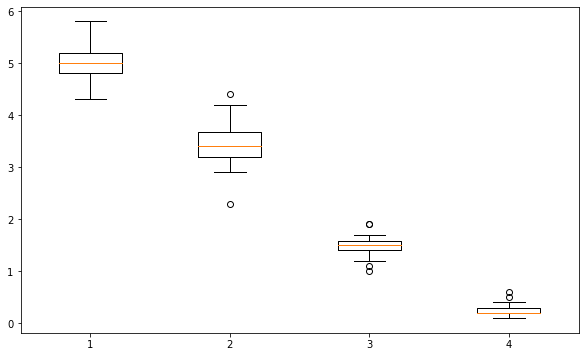

In [24]:
plt.figure(figsize=(10,6))
plt.boxplot(setosa)
plt.show()

(50, 4)

In [25]:
setosa

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


 2. 학습 및 테스트 데이터로 분리

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=2021)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [34]:
import numpy as np
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([34, 36, 42], dtype=int64))

In [37]:
# 불균형 문제 해결 위한 방법 stratify

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=2021)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [36]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([37, 37, 38], dtype=int64))

In [40]:
# 테스트 데이터 비율 조절 test_size

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=2021)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [41]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40], dtype=int64))

 3. 결정 나무 모델(Decision Tree)

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
# 결정 나무(Decision Tree)
dtc = DecisionTreeClassifier(random_state=2022)

In [46]:
# 하이퍼 파라미터 확인
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [47]:
# 학습(훈련)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [59]:
# 분류 또는 예측
pred_dt =dtc.predict(X_test)

In [51]:
res = pd.DataFrame({'y':y_test, 'DT':pred_dt})
res

,y,DT
0,0,0
1,1,1
2,1,2
3,2,2
4,0,0
5,1,1
6,0,0
7,1,1
8,2,2
9,0,0


In [60]:
# 예측(분류)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt)

0.9

In [54]:
# 예측 및 평가 동시 작업
dtc.score(X_test,y_test)

0.9

 4. Support Vector Machine(SVM)

In [55]:
# 모델 생성 및 학습
from sklearn.svm import SVC
svc = SVC(random_state=2022)
svc.fit(X_train,y_train)

SVC(random_state=2022)

In [56]:
# 예측
pred_sv = svc.predict(X_test)

In [58]:
# 평가
accuracy_score(y_test,pred_sv)

0.9

 5. Logistic Rergression

In [62]:
# 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2022, max_iter=500)
lrc.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=2022)

In [63]:
# 분류(예측)
pred_lr = lrc.predict(X_test)


In [65]:
# 모델 평가
accuracy_score(y_test, pred_lr)

0.9333333333333333

In [67]:
# max_iter 부족으로 인한 오류
lrc2 = LogisticRegression(random_state=2022)
lrc2.fit(X_train, y_train)


d:\edu\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2022)

In [68]:
# 데이터 전처리_Scaling
from sklearn.preprocessing import MinMaxScaler
iris_scaled = MinMaxScaler().fit_transform(iris.data)

In [71]:
X_train2, X_test2, _, _ = train_test_split(iris_scaled, iris.target, stratify=iris.target, test_size=0.2, random_state=2022)

In [72]:
lrc2.fit(X_train2,y_train)

LogisticRegression(random_state=2022)

In [75]:
accuracy_score(y_test,lrc2.predict(X_test2))

0.1

 6. 3가지 모델 비교

In [77]:
dtc.score(X_test, y_test), svc.score(X_test, y_test), lrc.score(X_test, y_test)


(0.9, 0.9, 0.9333333333333333)

In [78]:
res['sv'] = pred_sv
res['LR'] = pred_lr

In [79]:
res

,y,DT,sv,LR
0,0,0,0,0
1,1,1,1,1
2,1,2,1,1
3,2,2,2,2
4,0,0,0,0
5,1,1,1,1
6,0,0,0,0
7,1,1,1,1
8,2,2,2,2
9,0,0,0,0
